In [47]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
import numpy as np
import os
from sympy import *
from sympy.parsing.sympy_parser import *

from scipy import *
from scipy import integrate
from scipy.integrate import ode

from jupyter_client.manager import KernelManager
from ipykernel import kernelapp as app


In [48]:
#Se crean las variables simbolicas dependientes e independientes

U= np.array([symbols('u1'), symbols('u2'), symbols('u3'), symbols('u4'), symbols('u5'), symbols('u6')]) # Se define el vector de entradas
V = np.array([symbols('u'),symbols('v'),symbols('w'),symbols('p'),symbols('q'),symbols('r')])
n = np.array([symbols('x'),symbols('y'),symbols('z'),symbols('theta'),symbols('phi'),symbols('psi')])
t = symbols("t") 


In [49]:
# Se importa el modelo matematico y se transforma de string a Scipy
from sympy import *
Modelo = {}
archivo = open("Modelo_Matematico_ecuaciones.txt", "r")
listt = archivo.readlines()
Modelo["VCMas"] = parse_expr(listt[0], evaluate=False)
Modelo["VCMenos"] = parse_expr(listt[1], evaluate=False)
Modelo["ndot"] = parse_expr(listt[2], evaluate=False)
archivo.close()

In [57]:
def ResolvEcuations(Modelo,VSym,nSym,USym,V_ant,n_ant,U,dt): #Retorna acelaraciones locales y velocidades inerciales
    Values = []
    for i in range(6):
        Values.append((VSym.item(i),V_ant.item(i))) #Agrega tupla de (symbolo valor)   
        Values.append((nSym.item(i),n_ant.item(i))) #Agrega tupla de (symbolo valor)
        Values.append((USym.item(i),U.item(i)))     #Agrega tupla de (symbolo valor)
 
    _Vdot = np.empty(6)
    _ndot = np.empty(6)

    for i in range(6):
        _ndot[i] = Modelo["ndot"][i].subs(Values)
        _Vdot[i] = Modelo["VCMas"][i].subs(Values)
        
   
    return [_Vdot*dt,_ndot*dt,]


In [58]:
#Se crea escalon unitario e impulso unitario
u_ = lambda t: np.piecewise(t,t>=0,[1,0])

a = -0.1
b = 40
dt =0.1
# PROCEDIMIENTO
t = np.arange(a, b, dt)
U1 = 349235.5992356712*u_(t-5)
U2 = 349235.599235671*u_(t-5)
U3 = -1038352.2727271*u_(t-5)
U4 = 12132780.0829876*u_(t-5)
U5 = 12132780.0829876*u_(t-5)
U6 = 0*u_(t+1)
MTrans = np.array([[349235.599235671,10776587.3982091,-16176850.5,304358412.466521,959766584.766585,       0     ],
                   [349235.599235671,-10776587.398208,-16176850.5,-304358412.46652,959766584.766585,       0     ],
                   [-1038352.2727271,0               ,-36979287.4,       0        ,-2853591720.7792,       0     ],
                   [12132780.0829876,1253934.43235767,     0     ,       0        ,     0          ,-420545026.35],
                   [12132780.0829876,-1253934.4323576,     0     ,       0        ,     0          ,420545026.354],
                   [       0        ,34510288.0658436,     0     ,       0        ,     0          ,       0     ]])

# SALIDA - GRAFICA


In [59]:
UValores = np.array([U1,U2,U3,U4,U5,U6])
UValores = UValores.transpose()
ceros = np.zeros(6)
Vdot = np.zeros(6)
ndot = np.zeros(6)
VActual = np.zeros(6)
nActual = np.zeros(6)
Referencia = np.array([0.1,0.2,-0.1,0,0,0])
errorV = np.array([0,0,0,0,0,0])
VValues = np.empty((t.size,6))
nValues = np.empty((t.size,6))
VdotValues = np.empty((t.size,6))
ndotValues = np.empty((t.size,6))
VectorerrorV = np.empty((t.size,6))
errori = 0
for i in arange(t.size):
    errori += (Referencia - VActual)*dt
    error = 20*(Referencia - VActual) + 100*errori
    U =  np.dot(MTrans,error)
    #errorV = np.array([298696514.773373, -310020310.159668, -12942750.6087662, 0, 0, 0])
    Vdot,ndot = ResolvEcuations(Modelo,V,n,U,VActual,nActual,U,dt)
    #Vdot,ndot = ResolvEcuations(Vdott,ndott,V,n,U,VActual,nActual,UValores[i],dt)

    VectorerrorV[i] = error
    VActual += Vdot
    nActual += ndot
    VValues[i] = VActual
    nValues[i] = nActual
    VdotValues[i] = Vdot
    ndotValues[i] = ndot
    
    #print("p = {}     q = {}    r = {}     ndot = {} t= {}".format(VActual[3],VActual[4],VActual[5],ndot[3], i*dt))

TypeError: can't convert expression to float

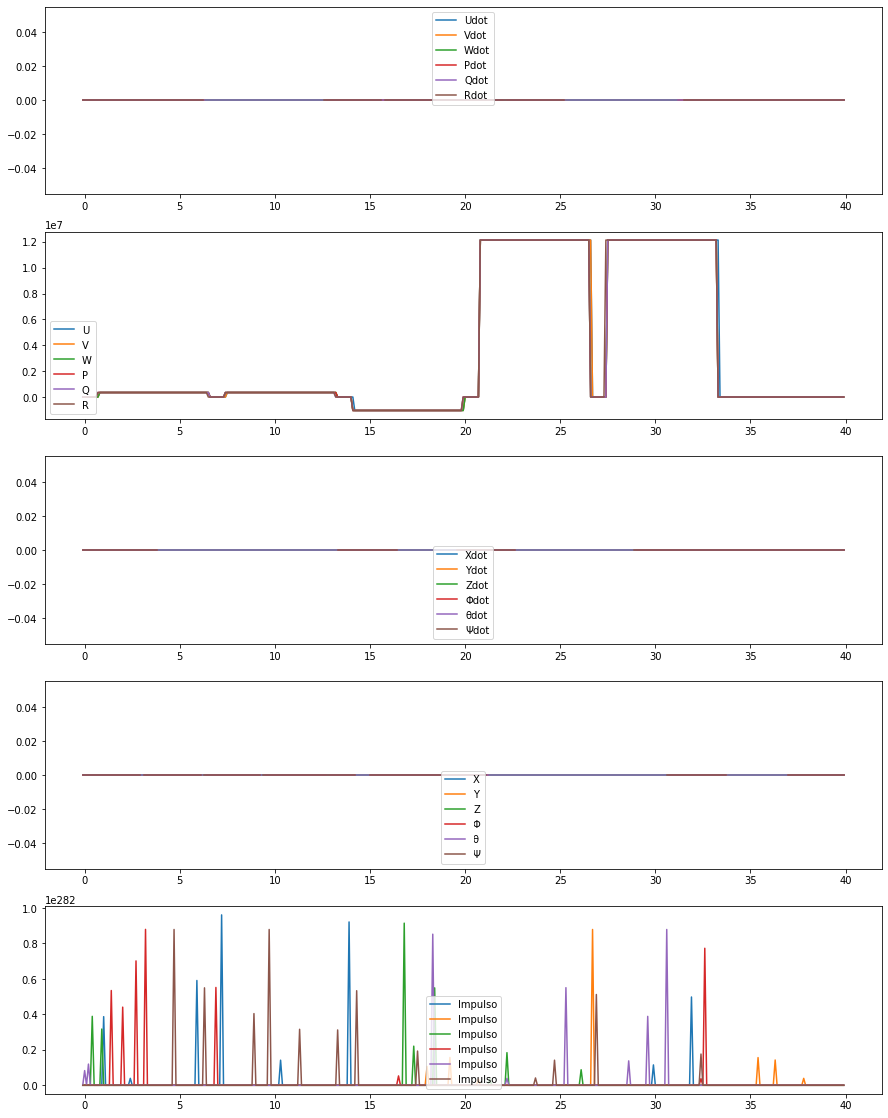

In [60]:
plt.figure(1, figsize = [15,20])

plt.subplot(511)
#plt.plot(t,u0,label='Impulso')
plt.plot(t,VdotValues.transpose()[0],label='Udot')
plt.plot(t,VdotValues.transpose()[1],label='Vdot')
plt.plot(t,VdotValues.transpose()[2],label='Wdot')
plt.plot(t,VdotValues.transpose()[3],label='Pdot')
plt.plot(t,VdotValues.transpose()[4],label='Qdot')
plt.plot(t,VdotValues.transpose()[5],label='Rdot')
plt.legend(loc='upper center')

plt.subplot(512)
#plt.plot(t,U1,label='Impulso')
plt.plot(t,VValues.transpose()[0],label='U')
plt.plot(t,VValues.transpose()[1],label='V')
plt.plot(t,VValues.transpose()[2],label='W')
plt.plot(t,VValues.transpose()[3],label='P')
plt.plot(t,VValues.transpose()[4],label='Q')
plt.plot(t,VValues.transpose()[5],label='R')
plt.legend(loc='lower left')


plt.subplot(513)
#plt.plot(t,u0,label='Impulso')
plt.plot(t,ndotValues.transpose()[0],label='Xdot')
plt.plot(t,ndotValues.transpose()[1],label='Ydot')
plt.plot(t,ndotValues.transpose()[2],label='Zdot')
plt.plot(t,ndotValues.transpose()[3],label='Φdot')
plt.plot(t,ndotValues.transpose()[4],label='θdot')
plt.plot(t,ndotValues.transpose()[5],label='Ψdot')
plt.legend(loc='lower center')

plt.subplot(514)
#plt.plot(t,u0,label='Impulso')
plt.plot(t,nValues.transpose()[0],label='X')
plt.plot(t,nValues.transpose()[1],label='Y')
plt.plot(t,nValues.transpose()[2],label='Z')
plt.plot(t,nValues.transpose()[3],label='Φ')
plt.plot(t,nValues.transpose()[4],label='θ')
plt.plot(t,nValues.transpose()[5],label='Ψ')
plt.legend(loc='lower center')

plt.subplot(515)
plt.plot(t,VectorerrorV,label='Impulso')
plt.legend(loc='lower center')

In [56]:
#Esto e spara resolver la ecuacion


Solve = []
Solve.append(Vdott["CMas"][0].subs([(u, 0), (x, 0.0), (u1, u1), (v, 0), (y, 0.0), (u2, u2), (w, 0), (z, 0.0), (u3, u3), (p, 0.0), (phi, 0.0), (u4, u4), (q, 0.0), (theta, 0.0), (u5, u5), (r, 0.0), (psi, 0.0), (u6, u6)]))
Solve.append(Vdott["CMas"][1].subs([(u, 0), (x, 0.0), (u1, u1), (v, 0), (y, 0.0), (u2, u2), (w, 0), (z, 0.0), (u3, u3), (p, 0.0), (phi, 0.0), (u4, u4), (q, 0.0), (theta, 0.0), (u5, u5), (r, 0.0), (psi, 0.0), (u6, u6)]))
Solve.append(Vdott["CMas"][2].subs([(u, 0), (x, 0.0), (u1, u1), (v, 0), (y, 0.0), (u2, u2), (w, 0), (z, 0.0), (u3, u3), (p, 0.0), (phi, 0.0), (u4, u4), (q, 0.0), (theta, 0.0), (u5, u5), (r, 0.0), (psi, 0.0), (u6, u6)]))
Solve.append(Vdott["CMas"][3].subs([(u, 0), (x, 0.0), (u1, u1), (v, 0), (y, 0.0), (u2, u2), (w, 0), (z, 0.0), (u3, u3), (p, 0.0), (phi, 0.0), (u4, u4), (q, 0.0), (theta, 0.0), (u5, u5), (r, 0.0), (psi, 0.0), (u6, u6)]))
Solve.append(Vdott["CMas"][4].subs([(u, 0), (x, 0.0), (u1, u1), (v, 0), (y, 0.0), (u2, u2), (w, 0), (z, 0.0), (u3, u3), (p, 0.0), (phi, 0.0), (u4, u4), (q, 0.0), (theta, 0.0), (u5, u5), (r, 0.0), (psi, 0.0), (u6, u6)]))
Solve.append(Vdott["CMas"][5].subs([(u, 0), (x, 0.0), (u1, u1), (v, 0), (y, 0.0), (u2, u2), (w, 0), (z, 0.0), (u3, u3), (p, 0.0), (phi, 0.0), (u4, u4), (q, 0.0), (theta, 0.0), (u5, u5), (r, 0.0), (psi, 0.0), (u6, u6)]))

Solve = np.array(Solve) + np.array([0,0,0,0,0,0])
print(Solve.tolist())



NameError: name 'Vdott' is not defined

In [ ]:
from sympy import *
linsolve(Solve.tolist(), [u1,u2,u3,u4,u5,u6])